In [1]:
import pandas as pd
import numpy as np
import csv
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:/Users/phuro/UCSD/MATH189/MATH189/Project/data/1976-2020-president.csv")

In [3]:
data['year'] = data['year'].apply(lambda x: str(x))
data

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT
1,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,504070,1182850,20210113,NaN,REPUBLICAN
2,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"MADDOX, LESTER",AMERICAN INDEPENDENT PARTY,False,9198,1182850,20210113,NaN,OTHER
3,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"BUBAR, BENJAMIN """"BEN""""",PROHIBITION,False,6669,1182850,20210113,NaN,OTHER
4,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"HALL, GUS",COMMUNIST PARTY USE,False,1954,1182850,20210113,NaN,OTHER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4282,2020,WYOMING,WY,56,83,68,US PRESIDENT,"JORGENSEN, JO",LIBERTARIAN,False,5768,278503,20210113,NaN,LIBERTARIAN
4283,2020,WYOMING,WY,56,83,68,US PRESIDENT,"PIERCE, BROCK",INDEPENDENT,False,2208,278503,20210113,NaN,OTHER
4284,2020,WYOMING,WY,56,83,68,US PRESIDENT,NaN,NaN,True,1739,278503,20210113,NaN,OTHER
4285,2020,WYOMING,WY,56,83,68,US PRESIDENT,OVERVOTES,NaN,False,279,278503,20210113,NaN,OTHER


In [4]:
data['party_simplified'] = data['party_simplified'].apply(lambda x: x if x in ['DEMOCRAT', 'REPUBLICAN'] else 'OTHER')

In [5]:
# df_years = df.groupby(['year', 'state']).count()
# df_years = df_years.reset_index()
# single_state_df = df_years[df_years['state'] == 'ALABAMA'][['year', 'office']]
# states = df['state'].unique()
# for state in states:
#     single_state_df = df_years[df_years['state'] == state][['year', 'office']]
#     plt.figure()
#     plt.title(f'Plot for {state}')
#     sns.lineplot(single_state_df, x='year', y='office')
# # years = df['year'].unique()
# # num_candidates_per_year = []
# # for year in years:
# #     new_df = df_years[year]
# #     for state in states:
# #         num_candidates_per_year.append(new_df[state]['candidate'])
# # num_candidates_per_year
# df_years

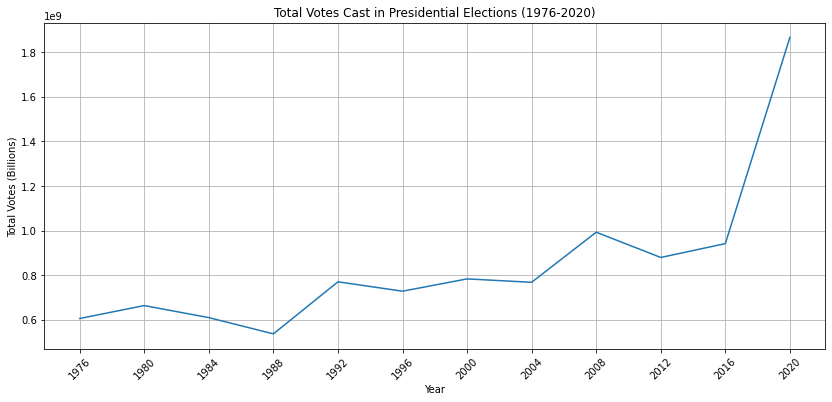

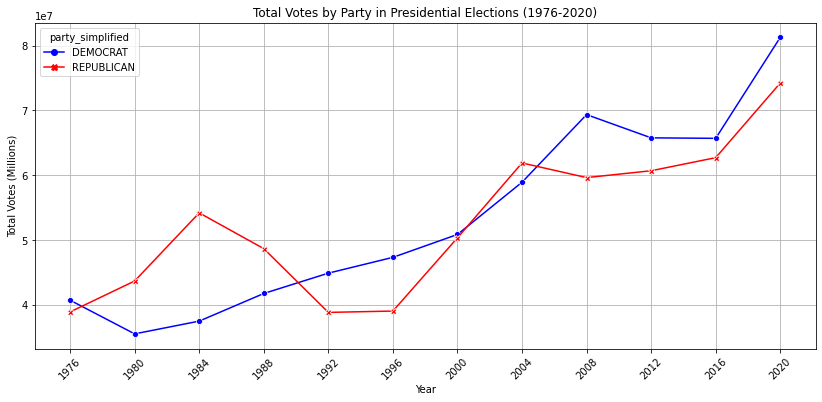

In [6]:
# Aggregate data for total votes per year
yearly_votes = data.groupby('year')['totalvotes'].sum().reset_index()

# Aggregate data for votes by party (Democrat and Republican) per year
party_yearly_votes = data[data['party_simplified'].isin(['DEMOCRAT', 'REPUBLICAN'])].groupby(['year', 'party_simplified'])['candidatevotes'].sum().reset_index()

# Plotting total votes over time
plt.figure(figsize=(14, 6))
sns.lineplot(x='year', y='totalvotes', data=yearly_votes)
plt.title('Total Votes Cast in Presidential Elections (1976-2020)')
plt.xlabel('Year')
plt.ylabel('Total Votes (Billions)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plotting total votes by party over time
# plt.figure(figsize=(14, 6))
# sns.lineplot(x='year', y='candidatevotes', hue='party_simplified', style='party_simplified', markers=True, dashes=False, data=party_yearly_votes)
# plt.title('Total Votes by Party in Presidential Elections (1976-2020)')
# plt.xlabel('Year')
# plt.ylabel('Total Votes (Millions)')
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.show()

party_colors = {"DEMOCRAT": "blue", "REPUBLICAN": "red"}

# Plot using the custom palette
plt.figure(figsize=(14, 6))
sns.lineplot(
    x='year', 
    y='candidatevotes', 
    hue='party_simplified', 
    style='party_simplified', 
    markers=True, 
    dashes=False, 
    data=party_yearly_votes,
    palette=party_colors  # Use the custom palette
)
plt.title('Total Votes by Party in Presidential Elections (1976-2020)')
plt.xlabel('Year')
plt.ylabel('Total Votes (Millions)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [7]:
#Analyzing the percentage of total votes received by the Democratic, Republican and other parties 
#each year to see how their share of the electorate has changed.

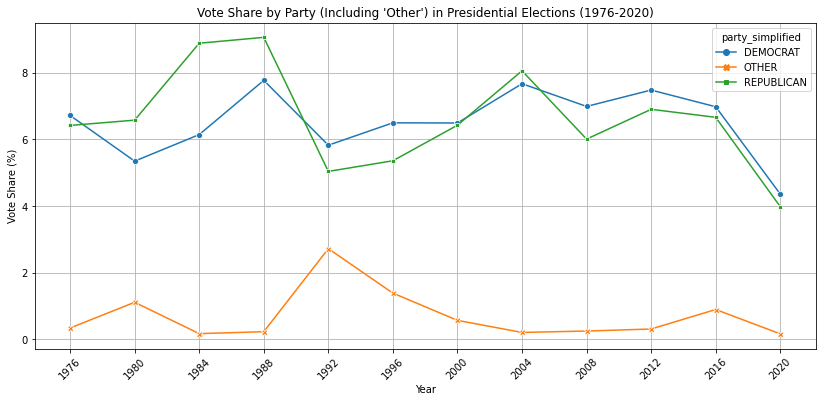

In [8]:
party_yearly_votes_incl_other = data.groupby(['year', 'party_simplified'])['candidatevotes'].sum().reset_index()
vote_shares_incl_other = party_yearly_votes_incl_other.copy()
vote_shares_incl_other['total_votes_year'] = vote_shares_incl_other['year'].map(yearly_votes.set_index('year')['totalvotes'])
vote_shares_incl_other['vote_share'] = (vote_shares_incl_other['candidatevotes'] / vote_shares_incl_other['total_votes_year']) * 100
plt.figure(figsize=(14, 6))
sns.lineplot(x='year', y='vote_share', hue='party_simplified', style='party_simplified', markers=True, dashes=False, data=vote_shares_incl_other)
plt.title('Vote Share by Party (Including \'Other\') in Presidential Elections (1976-2020)')
plt.xlabel('Year')
plt.ylabel('Vote Share (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [9]:
# Set Seaborn style
sns.set_style("ticks")  # Example styles: 'darkgrid', 'whitegrid', 'dark', 'white', 'ticks'

# Select a color palette
palette = sns.color_palette("husl", 3)  # Change 'husl' to another palette or define custom colors

# # Set context
# sns.set_context("talk")

In [10]:
# sns.set()

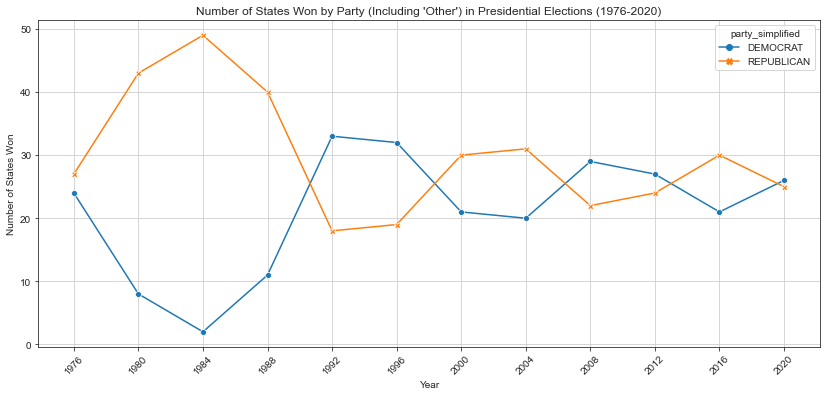

In [11]:
winners = data.loc[data.groupby(['year', 'state'])['candidatevotes'].idxmax()]
states_won_incl_other = winners.groupby(['year', 'party_simplified'])['state'].count().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(x='year', y='state', hue='party_simplified', style='party_simplified', markers=True, dashes=False, data=states_won_incl_other)
plt.title('Number of States Won by Party (Including \'Other\') in Presidential Elections (1976-2020)')
plt.xlabel('Year')
plt.ylabel('Number of States Won')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [12]:
yearly_votes = data.groupby('year')['totalvotes'].sum().reset_index()

In [13]:
party_yearly_votes = data.groupby(['year', 'party_simplified'])['candidatevotes'].sum().reset_index()

In [14]:
last_5_years_incl_2020 = ['2004', '2008', '2012', '2016', '2020']

In [15]:
vote_shares_incl_other

,year,party_simplified,candidatevotes,total_votes_year,vote_share
0,1976,DEMOCRAT,40680446,605944064,6.713565
1,1976,OTHER,2050005,605944064,0.338316
2,1976,REPUBLICAN,38870893,605944064,6.414931
3,1980,DEMOCRAT,35480948,663902096,5.344304
4,1980,OTHER,7373264,663902096,1.110595
5,1980,REPUBLICAN,43642639,663902096,6.573656
6,1984,DEMOCRAT,37449813,609936856,6.139949
7,1984,OTHER,1038219,609936856,0.170217
8,1984,REPUBLICAN,54166829,609936856,8.880727
9,1988,DEMOCRAT,41716679,537099170,7.767035


In [16]:
print(last_5_years_incl_2020)  # Confirm the years you're interested in
filtered_data = vote_shares_incl_other[vote_shares_incl_other['year'].isin(last_5_years_incl_2020)]
print(filtered_data)  # See if the filtering is working as expected

['2004', '2008', '2012', '2016', '2020']
    year party_simplified  candidatevotes  total_votes_year  vote_share
21  2004         DEMOCRAT        58894561         768259747    7.665970
22  2004            OTHER         1582178         768259747    0.205943
23  2004       REPUBLICAN        61872711         768259747    8.053619
24  2008         DEMOCRAT        69338846         992684830    6.984981
25  2008            OTHER         2466572         992684830    0.248475
26  2008       REPUBLICAN        59613835         992684830    6.005313
27  2012         DEMOCRAT        65752017         879479158    7.476245
28  2012            OTHER         2717863         879479158    0.309031
29  2012       REPUBLICAN        60670117         879479158    6.898414
30  2016         DEMOCRAT        65677288         941573717    6.975268
31  2016            OTHER         8417229         941573717    0.893953
32  2016       REPUBLICAN        62692670         941573717    6.658286
33  2020         DEMOCR

In [17]:
type(vote_shares_incl_other['year'][0])

str

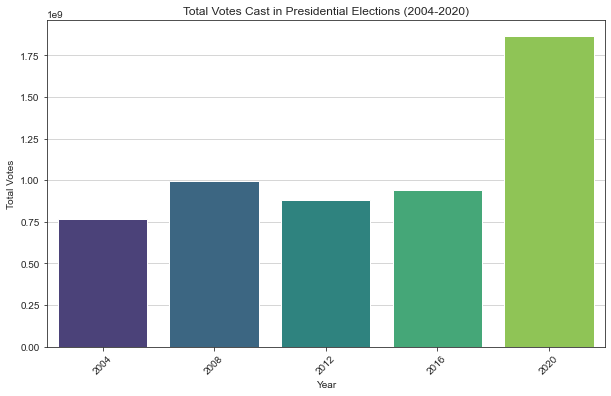

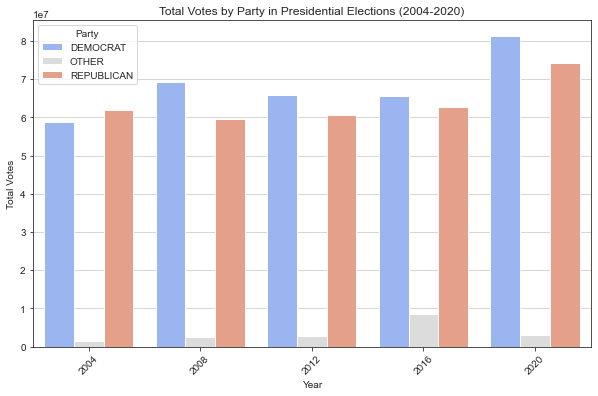

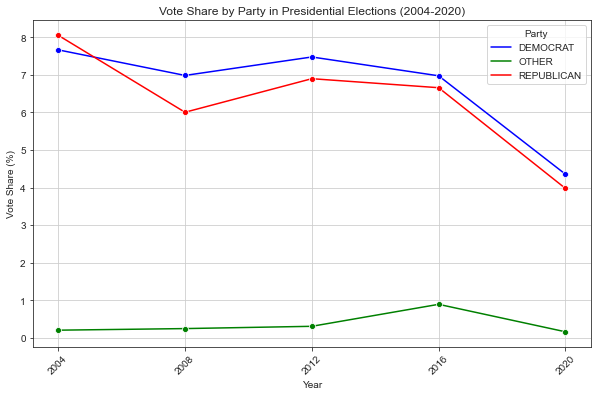

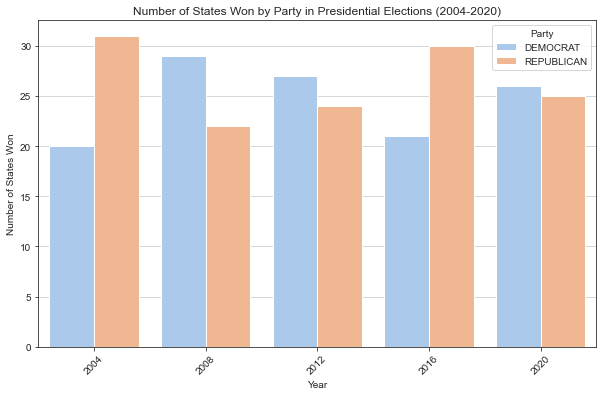

In [18]:
%matplotlib inline

custom_palette = {'DEMOCRAT': 'blue', 'REPUBLICAN': 'red', 'OTHER': 'green'}
# Filter the overall and party-specific data for the last 5 election years including 2020
yearly_votes_last_5 = yearly_votes[yearly_votes['year'].isin(last_5_years_incl_2020)]
party_yearly_votes_last_5 = party_yearly_votes[party_yearly_votes['year'].isin(last_5_years_incl_2020)]
vote_shares_last_5 = vote_shares_incl_other[vote_shares_incl_other['year'].isin(last_5_years_incl_2020)]
states_won_last_5 = states_won_incl_other[states_won_incl_other['year'].isin(last_5_years_incl_2020)]

# Total Votes Cast in Presidential Elections for the last 5 years including 2020
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='totalvotes', data=yearly_votes_last_5, palette='viridis')
plt.title('Total Votes Cast in Presidential Elections (2004-2020)')
plt.xlabel('Year')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Total Votes by Party in Presidential Elections for the last 5 years including 2020
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='candidatevotes', hue='party_simplified', data=party_yearly_votes_last_5, palette='coolwarm')
plt.title('Total Votes by Party in Presidential Elections (2004-2020)')
plt.xlabel('Year')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)
plt.legend(title='Party')
plt.grid(axis='y')
plt.show()

# Vote Share Over Time for the last 5 years including 2020

plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='vote_share', hue='party_simplified', data=vote_shares_last_5, marker='o', style='party_simplified', dashes=False, palette=custom_palette)
plt.title('Vote Share by Party in Presidential Elections (2004-2020)')
plt.xlabel('Year')
plt.ylabel('Vote Share (%)')
plt.xticks(rotation=45)
plt.legend(title='Party')
plt.grid(True)
plt.show()

# Number of States Won for the last 5 years including 2020
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='state', hue='party_simplified', data=states_won_last_5, palette='pastel')
plt.title('Number of States Won by Party in Presidential Elections (2004-2020)')
plt.xlabel('Year')
plt.ylabel('Number of States Won')
plt.xticks(rotation=45)
plt.legend(title='Party')
plt.grid(axis='y')
plt.show()


In [19]:
last_5_years_incl_2020 = [2004, 2008, 2012, 2016, 2020]

# Filter the original election dataset for these years
data_last_5 = data[data['year'].isin(last_5_years_incl_2020)]
data['year'].isin([2004, 2008, 2012, 2016, 2020])

0       False
1       False
2       False
3       False
4       False
        ...  
4282    False
4283    False
4284    False
4285    False
4286    False
Name: year, Length: 4287, dtype: bool

In [20]:
data_last_5

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified


In [21]:
winners_red_states_all_years.groupby('party_simplified')['state'].count().reset_index()

NameError: name 'winners_red_states_all_years' is not defined

In [22]:
# Filter the dataset for the corrected red states over all years included in the dataset
red_states_data_all_years = data[data['state'].isin(corrected_red_states)]

# Determine the winner in each corrected red state for each election year
winners_red_states_all_years = red_states_data_all_years.loc[red_states_data_all_years.groupby(['year', 'state'])['candidatevotes'].idxmax()]

# Aggregate the number of wins for each party in corrected red states over all election years
red_states_wins_all_years = winners_red_states_all_years.groupby('party_simplified')['state'].count().reset_index()

# Display the aggregated wins for each party in corrected red states over all years
red_states_wins_all_years

NameError: name 'corrected_red_states' is not defined

In [23]:
rep_states = ["Wyoming", "West Virginia", "Utah", "Texas", "Tennessee", "South Dakota", "South Carolina", "Oklahoma", "North Dakota", "Nebraska", "Montana", "Missouri", "Mississippi", "Louisiana", "Kentucky", "Kansas", "Iowa", "Indiana", "Idaho", "Arkansas", "Alaska", "Alabama"]

In [24]:
rep_states.sort()
rep_states = [x.upper() for x in rep_states]
rep_states

['ALABAMA',
 'ALASKA',
 'ARKANSAS',
 'IDAHO',
 'INDIANA',
 'IOWA',
 'KANSAS',
 'KENTUCKY',
 'LOUISIANA',
 'MISSISSIPPI',
 'MISSOURI',
 'MONTANA',
 'NEBRASKA',
 'NORTH DAKOTA',
 'OKLAHOMA',
 'SOUTH CAROLINA',
 'SOUTH DAKOTA',
 'TENNESSEE',
 'TEXAS',
 'UTAH',
 'WEST VIRGINIA',
 'WYOMING']

In [25]:
red_states_data_all_years = data[data['state'].isin(rep_states)]

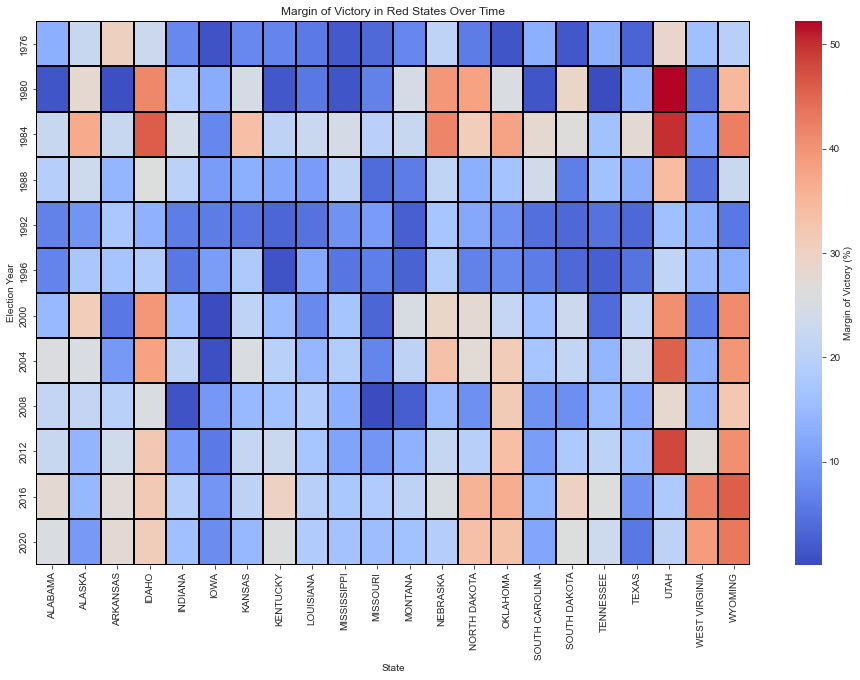

In [26]:
# Function to calculate the margin of victory in each state for each year
def calculate_margin_of_victory(group):
    sorted_group = group.sort_values(by='candidatevotes', ascending=False)
    top_two = sorted_group.head(2)
    if len(top_two) == 2:
        margin = (top_two.iloc[0]['candidatevotes'] - top_two.iloc[1]['candidatevotes']) / group['totalvotes'].iloc[0]
    else:
        margin = 1  # If only one candidate, consider it a 100% margin
    return pd.Series({'margin_of_victory': margin * 100})  # Convert to percentage

# Apply the function to the red states data for each year and state
red_states_margins = red_states_data_all_years.groupby(['year', 'state']).apply(calculate_margin_of_victory).reset_index()

# Pivot the data for easier analysis and plotting
pivot_red_states_margins = red_states_margins.pivot(index='year', columns='state', values='margin_of_victory')

# Plotting the margins of victory in red states over time
plt.figure(figsize=(16, 10))
sns.heatmap(pivot_red_states_margins, cmap='coolwarm', linewidths=0.1, linecolor='black', cbar_kws={'label': 'Margin of Victory (%)'})
plt.title('Margin of Victory in Red States Over Time')
plt.xlabel('State')
plt.ylabel('Election Year')
plt.show()


In [27]:
import sklearn
from sklearn.cluster import KMeans

red_states_data_all_years.columns

Index(['year', 'state', 'state_po', 'state_fips', 'state_cen', 'state_ic',
       'office', 'candidate', 'party_detailed', 'writein', 'candidatevotes',
       'totalvotes', 'version', 'notes', 'party_simplified'],
      dtype='object')

In [28]:
# Step 1: Calculate vote shares
red_states_data_all_years['vote_share'] = (red_states_data_all_years['candidatevotes'] / red_states_data_all_years['totalvotes']) * 100

# Filter out rows for Republican and highest other party vote share in each state-year
republican_shares = red_states_data_all_years[red_states_data_all_years['party_simplified'] == 'REPUBLICAN']
highest_other_shares = red_states_data_all_years[red_states_data_all_years['party_simplified'] != 'REPUBLICAN'].groupby(['year', 'state'], as_index=False)['vote_share'].max()

# Step 2: Aggregate average vote shares over all years for each red state
avg_republican_shares = republican_shares.groupby('state')['vote_share'].mean().reset_index(name='avg_rep_vote_share')
avg_highest_other_shares = highest_other_shares.groupby('state')['vote_share'].mean().reset_index(name='avg_other_vote_share')

# Merge the average vote shares into a single DataFrame
avg_vote_shares = pd.merge(avg_republican_shares, avg_highest_other_shares, on='state')

# Step 3: Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(avg_vote_shares[['avg_rep_vote_share', 'avg_other_vote_share']])
avg_vote_shares['cluster'] = kmeans.labels_

# Display the first few rows of the DataFrame with cluster labels to verify
avg_vote_shares

C:\Users\phuro\AppData\Local\Temp\ipykernel_18608\2585959921.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  red_states_data_all_years['vote_share'] = (red_states_data_all_years['candidatevotes'] / red_states_data_all_years['totalvotes']) * 100
c:\Users\phuro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,state,avg_rep_vote_share,avg_other_vote_share,cluster
0,ALABAMA,56.063475,40.982889,1
1,ALASKA,55.565290,34.413505,2
2,ARKANSAS,51.668630,44.541250,1
3,IDAHO,61.641943,31.162708,0
4,INDIANA,54.540543,40.996528,1
5,IOWA,47.254579,47.495775,1
6,KANSAS,56.234302,37.860408,2
7,KENTUCKY,54.575567,41.912894,1
8,LOUISIANA,52.943328,43.605026,1
9,MISSISSIPPI,55.125682,42.327357,1


In [29]:
red_states_data_all_years['vote_share'] = (red_states_data_all_years['candidatevotes'] / red_states_data_all_years['totalvotes']) * 100

# Filter for Republican vote shares
republican_shares = red_states_data_all_years[red_states_data_all_years['party_simplified'] == 'REPUBLICAN']

# For other parties, find the highest vote share in each state-year that is not Republican
highest_other_shares = red_states_data_all_years[red_states_data_all_years['party_simplified'] != 'REPUBLICAN']
highest_other_shares = highest_other_shares.groupby(['year', 'state'])['vote_share'].max().reset_index()

C:\Users\phuro\AppData\Local\Temp\ipykernel_18608\2023173549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  red_states_data_all_years['vote_share'] = (red_states_data_all_years['candidatevotes'] / red_states_data_all_years['totalvotes']) * 100


In [30]:
avg_republican_shares = republican_shares.groupby('state')['vote_share'].mean().reset_index(name='avg_rep_vote_share')
avg_highest_other_shares = highest_other_shares.groupby('state')['vote_share'].mean().reset_index(name='avg_other_vote_share')


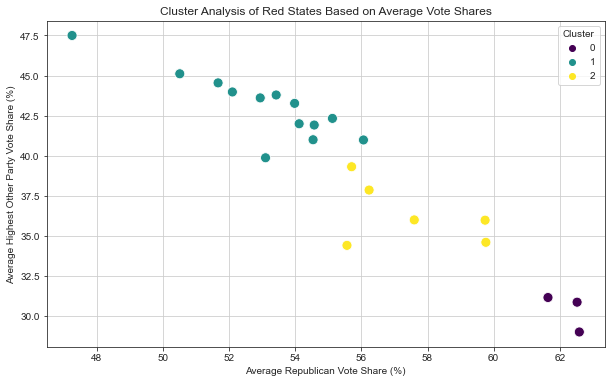

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=avg_vote_shares, x='avg_rep_vote_share', y='avg_other_vote_share', hue='cluster', palette='viridis', s=100)
plt.title('Cluster Analysis of Red States Based on Average Vote Shares')
plt.xlabel('Average Republican Vote Share (%)')
plt.ylabel('Average Highest Other Party Vote Share (%)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [32]:
from scipy.spatial.distance import jensenshannon
import numpy as np

# Example: Probability distributions of party preferences for three red states
# These would be based on actual vote shares converted to probabilities
state1_dist = np.array([0.7, 0.2, 0.1])  # Example distribution for state 1 (e.g., TX)
state2_dist = np.array([0.65, 0.25, 0.1]) # Example distribution for state 2 (e.g., TN)
state3_dist = np.array([0.8, 0.15, 0.05]) # Example distribution for state 3 (e.g., AL)

# Calculate JSD between the states
jsd_state1_state2 = jensenshannon(state1_dist, state2_dist, base=2)
jsd_state1_state3 = jensenshannon(state1_dist, state3_dist, base=2)
jsd_state2_state3 = jensenshannon(state2_dist, state3_dist, base=2)

# The closer the JSD value is to 0, the more similar the distributions are
# A higher JSD value indicates more dissimilarity between the distributions

# Statistical Significance
# To determine statistical significance, you would typically perform a hypothesis test
# comparing the JSD values against a critical value or by calculating p-values if possible

# Results interpretation
print(f"JSD between state 1 and state 2: {jsd_state1_state2}")
print(f"JSD between state 1 and state 3: {jsd_state1_state3}")
print(f"JSD between state 2 and state 3: {jsd_state2_state3}")


JSD between state 1 and state 2: 0.0517296210316205
JSD between state 1 and state 3: 0.10544744972587956
JSD between state 2 and state 3: 0.14438732212104144


In [67]:
data

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT
1,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,504070,1182850,20210113,NaN,REPUBLICAN
2,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"MADDOX, LESTER",AMERICAN INDEPENDENT PARTY,False,9198,1182850,20210113,NaN,OTHER
3,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"BUBAR, BENJAMIN """"BEN""""",PROHIBITION,False,6669,1182850,20210113,NaN,OTHER
4,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"HALL, GUS",COMMUNIST PARTY USE,False,1954,1182850,20210113,NaN,OTHER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4282,2020,WYOMING,WY,56,83,68,US PRESIDENT,"JORGENSEN, JO",LIBERTARIAN,False,5768,278503,20210113,NaN,OTHER
4283,2020,WYOMING,WY,56,83,68,US PRESIDENT,"PIERCE, BROCK",INDEPENDENT,False,2208,278503,20210113,NaN,OTHER
4284,2020,WYOMING,WY,56,83,68,US PRESIDENT,NaN,NaN,True,1739,278503,20210113,NaN,OTHER
4285,2020,WYOMING,WY,56,83,68,US PRESIDENT,OVERVOTES,NaN,False,279,278503,20210113,NaN,OTHER


## Jensen-Shannon Divergence

In [33]:
import pandas as pd
from scipy.spatial.distance import jensenshannon

In [35]:
# Define the red states as identified earlier
red_states = ['FL', 'PA', 'OH']

# We will filter out the data for the year 2020 for these states
data_2020 = data[data['year'] == '2020']

# Now let's focus only on the red states for the year 2020
data_2020_red = data_2020[data_2020['state_po'].isin(red_states)]

# Create vote share distributions for each state
# We'll do this by first creating a total votes per state per party DataFrame
totals_by_state_party = data_2020_red.groupby(['state_po', 'party_simplified'])['candidatevotes'].sum().unstack(fill_value=0)

# Normalize the rows to sum to 1 to create distributions
distribution_by_state = totals_by_state_party.div(totals_by_state_party.sum(axis=1), axis=0)

# Ensure all rows sum to 1 (i.e., they are proper probability distributions)
assert all(distribution_by_state.sum(axis=1).round(4) == 1), "Rows do not sum to 1"

# Calculate the Jensen-Shannon Divergence for each pair of red states
jsd_values = {}
for i, state1 in enumerate(red_states):
    for state2 in red_states[i+1:]:
        # Make sure to compare different states
        dist1 = distribution_by_state.loc[state1]
        dist2 = distribution_by_state.loc[state2]
        jsd_values[(state1, state2)] = jensenshannon(dist1, dist2, base=2)

jsd_values

{('FL', 'PA'): 0.021570251870334692,
 ('FL', 'OH'): 0.030067264408239293,
 ('PA', 'OH'): 0.04140294154771597}

In [94]:
from scipy.stats import chi2_contingency

# Assuming 'data' is a DataFrame containing the election results
# For example purposes, let's create some dummy observed vote shares for red states
observed_vote_shares = {
    'TX': {'REPUBLICAN': 0.62, 'OTHER': 0.38},
    'AL': {'REPUBLICAN': 0.66, 'OTHER': 0.34},
    'MS': {'REPUBLICAN': 0.58, 'OTHER': 0.42},
}

# Convert observed vote shares into observed frequencies
# Assuming each state has a total of 1 million votes for simplicity
total_votes = 1_000_000
observed_frequencies = {state: [votes['REPUBLICAN']*total_votes, votes['OTHER']*total_votes] for state, votes in observed_vote_shares.items()}

# Define expected frequencies based on the null hypothesis (70% for Republican, 30% for Other)
expected_red_vote_share = 0.7
expected_frequencies = [expected_red_vote_share*total_votes, (1 - expected_red_vote_share)*total_votes]

# Calculate the likelihood ratios
likelihood_ratios = {}
for state, obs_freq in observed_frequencies.items():
    stat, p, dof, expected = chi2_contingency([obs_freq, expected_frequencies], lambda_="log-likelihood")
    likelihood_ratios[state] = {'stat': stat, 'p-value': p}

likelihood_ratios

{'TX': {'stat': 14284.696539236335, 'p-value': 0.0},
 'AL': {'stat': 3678.086416268721, 'p-value': 0.0},
 'MS': {'stat': 31359.650158461925, 'p-value': 0.0}}